## ***Background***
1. **Objektif**,
Mengembangkan solusi berbasis AI untuk memecahkan permasalahan mengenai sulit memahami inti bacaan berita, penjabaran berita yang bertele-tele, dan keinginan dengan cepat menyerap dari suatu informasi. Oleh karena itu munculah target yaitu meringkas dokumen dengan metode text understanding yang dapat memperoleh gagasan utama dari suatu berita. Untuk mencapai target tersebut dapat menggunakan model Pre-trained.

2. **Solusi dengan Text Summarization**,
Medel yang digunakan ialah model pre-trained untuk merangkum text menjadi ringkasan yang lebih singkat namun tetap mempertahankan poin kunci, frasa, dan konteks teks tersebut sehingga didapatkan teks dalam bentuk yang lebih ringkas dan padat. Model pre-trained adalah model atau jaringan yang telah dibuat oleh orang lain dan dilatih pada dataset besar untuk menyelesaikan masalah serupa.

3. **Dataset**,
Dataset yang digunakan adalah hasil scrapping data dari website detik.com yang menghasilkan 450 baris. Setiap data memuat informasi berikut:
***judul***: Judul berita pada halaman website,
***url***: spesifik link berita,
***kategori***: spesifik bagian dari detik.com pada berita tersebut,
***tanggal***: waktu pembuatan berita,
***ringkasan***: sub-header dari judul berita,
***isi_berita***: detail isi berita mencakup keseluruhan halaman,
***penulis***: penulis dari berita tersebut.

In [1]:
!pip install requests beautifulsoup4
!pip install Sastrawi --upgrade
!pip install transformers --upgrade
!pip install rouge --upgrade
!pip install sentencepiece
!pip install datsets transformers[sentencepiece]
!pip install sentencepiece


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/209.7 kB ? eta -:--:--
     ----- ---------------------------------- 30.7/209.7 kB ? eta -:--:--
     ------- ----------------------------- 41.0/209.7 kB 388.9 kB/s eta 0:00:01
     ------- ----------------------------- 41.0/209.7 kB 388.9 kB/s eta 0:00:01
     -------------- ---------------------- 81.9/209.7 kB 381.3 kB/s eta 0:00:01
     -------------- ---------------------- 81.9/209.7 kB 381.3 kB/s eta 0:00:01
     -------------- ---------------------- 81.9/209.7 kB 381.3 kB/s eta 0:00:01
     ------------------------------------ 209.7/209.7 kB 606.2 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/c1/bd/f64d67df4d3b05a460f281defe830ffab6d7940b7ca98ec085e94e024781/transformers-4.34.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/121.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/121.5 kB ? eta -:--:--
     --------------------- --------------- 71.7/121.5 kB 787.7 kB/s eta 0:00:01
     ----------------------------- --------- 92.2/121.5 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 121.5/121.5 kB 713.5 kB/s eta 0:00:00
  Obtaining dependency information for tokenizers<0.15,>=0.14 from https://files.pythonhosted.org/packages/c3/29/0d9975fb739bdbefc73b6c23f335ea18e752fe6d2e91f3266a10dc8be140/tokenizers-0.14.1-cp311-none-win_amd64.whl.metadata
  Obtaining dependency information for safetensors>=0.3.1 from https://files.pythonhosted.org/packages/da/33/f7437e23b0bb3f14014ab60de5948ca2b5187031e955e2db2fa872e35a3c/safeten


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement datsets (from versions: none)
ERROR: No matching distribution found for datsets

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install datasets
!pip install rouge_score


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24972 sha256=a3571a468d7eecd14aedf802d50601a0a376f95b9114e07a5dd6351c275004cf
  Stored in directory: c:\users\saaa\appdata\local\pip\cache\wheels\1e\19\43\8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sentencepiece
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import chain
import pandas as pd
import string
from collections import Counter
import re
from wordcloud import WordCloud

import string

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from transformers import BertTokenizer, BertForSequenceClassification, DataCollator, Trainer, TrainingArguments,AutoTokenizer,BertTokenizer, EncoderDecoderModel
from transformers import AutoTokenizer

from transformers import T5Tokenizer, T5Model, T5ForConditionalGeneration

from rouge import Rouge

In [5]:
!pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/74/07/edce54779f5c3fe8ab8390eafad3d7c8190fce68f922a254ea77f4a94a99/torch-2.1.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/d5/f0/8fbc882ca80cf077f1b246c0e3c3465f7f415439bdea6b899f6b19f61f70/networkx-3.2.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/192.3 MB 991.0 kB/s eta 0:03:15
   ---------------------------------------- 0.1/192.3 MB 2.2 MB/s eta 0:01:27
   ---------------------------------------- 0.2/192.3 MB 1.5 MB/s eta 0:02:08
   ---------------------------------------- 0.2/192.3 MB 1.5 MB/s eta 0:02:08
   ---------------------------------------- 0.3/192.3 MB 1.4 MB/s eta 0:02:16
   ---------------------------------------- 0.4/192.3 MB 1.4 MB/s eta 0:02:18
   ---------------------------------------- 0.4/192.3 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   -------------------- ----------------- 103.8/192.3 MB 161.0 kB/s eta 0:09:11
   -------------------- ----------------- 103.8/192.3 MB 160.5 kB/s eta 0:09:12
   -------------------- ----------------- 103.8/192.3 MB 160.5 kB/s eta 0:09:12
   -------------------- ----------------- 103.8/192.3 MB 160.5 kB/s eta 0:09:12
   -------------------- ----------------- 103.8/192.3 MB 160.5 kB/s eta 0:09:12
   -------------------- ----------------- 103.8/192.3 MB 162.1 kB/s eta 0:09:07
   -------------------- ----------------- 103.8/192.3 MB 162.1 kB/s eta 0:09:07
   -------------------- ----------------- 103.8/192.3 MB 161.9 kB/s eta 0:09:07
   -------------------- ----------------- 103.8/192.3 MB 161.9 kB/s eta 0:09:07
   -------------------- ----------------- 103.8/192.3 MB 162.2 kB/s eta 0:09:06
   -------------------- ----------------- 103.8/192.3 MB 162.2 kB/s eta 0:09:06
   -------------------- ----------------- 103.8/192.3 MB 162.2 kB/s eta 0:09:06
   -------------------- ----------------

In [21]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     -------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\saaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\saaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\saaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\commands\install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "C:\Users\saaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "C:\Users\saaa\AppData\Local\Programs\Python\Python311\Lib\site-pack


     - -------------------------------------- 0.1/2.7 GB 999.6 kB/s eta 0:44:16
     - -------------------------------------- 0.1/2.7 GB 998.0 kB/s eta 0:44:20
     - -------------------------------------- 0.1/2.7 GB 993.5 kB/s eta 0:44:32
     - -------------------------------------- 0.1/2.7 GB 993.5 kB/s eta 0:44:32
     - -------------------------------------- 0.1/2.7 GB 993.5 kB/s eta 0:44:32
     - -------------------------------------- 0.1/2.7 GB 993.5 kB/s eta 0:44:32
     - -------------------------------------- 0.1/2.7 GB 993.5 kB/s eta 0:44:32
     - -------------------------------------- 0.1/2.7 GB 993.5 kB/s eta 0:44:32
     - -------------------------------------- 0.1/2.7 GB 993.5 kB/s eta 0:44:32
     - -------------------------------------- 0.1/2.7 GB 964.3 kB/s eta 0:45:53
     - -------------------------------------- 0.1/2.7 GB 964.3 kB/s eta 0:45:53
     - -------------------------------------- 0.1/2.7 GB 957.1 kB/s eta 0:46:13
     - --------------------------------

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
import torch
from tqdm import tqdm
from datasets import load_metric

device = 'cuda' if torch.cuda.is_available() else 'cpu'

## ***Scrapping***

In [ ]:
def get_multiple_pages(base_url, query, sort_by, page_count, get_detail=True):

    list_judul = []
    list_url = []
    list_kategori = []
    list_tanggal = []
    list_summary = []
    list_detail_berita = []
    list_penulis = []

    for page in range(1, page_count+1):
        url = base_url + '&query=' + query + '&sortby=' + sort_by + '&page=' + str(page)
        print('Halaman: ', page)
        # Mengirim permintaan GET ke URL
        response = requests.get(url)
        # Mengecek status kode respons
        if response.status_code == 200:
            # Mengubah respons menjadi objek BeautifulSoup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Mencari elemen dengan class 'list-berita' yang berada di dalam div dengan class 'content'
            berita_elements = soup.select('.content .list-berita article')

            # Mengiterasi setiap elemen berita
            for berita in berita_elements:
                # Mendapatkan judul dan URL berita
                judul = berita.select_one('.box_text .title').text.strip()
                url_berita = berita.select_one('a')['href']
                category = berita.select_one('span .date .category').text.strip()
                date = berita.select_one('span .date .category').find_next_sibling(string=True)
                summary_berita = berita.select_one('p').text.strip()

                list_judul.append(judul)
                list_url.append(url_berita)
                list_kategori.append(category)
                list_tanggal.append(date)
                list_summary.append(summary_berita)

                if get_detail:
                    response_detail = requests.get(url_berita)
                    # Mengecek status kode respons halaman detail
                    if response_detail.status_code == 200:
                        soup_detail = BeautifulSoup(response_detail.text, 'html.parser')

                        # Mencari elemen detail
                        # soup_detail.select_one('.itp_bodycontent').find_all('p') atau soup_detail.select_one('div', class_='.itp_bodycontent').find_all('p')
                        div_itp_bodycontent = soup_detail.find('div', class_='itp_bodycontent')
                        if div_itp_bodycontent is not None:
                            detail_berita = ' '.join([p.text.strip() for p in div_itp_bodycontent.find_all('p')])
                        else:
                            detail_berita = ''
                        # for tag in soup.findAll('p'):
                        #   detail_berita = tag.get_text()
                        #   list_detail_berita.append(detail_berita)

                        author = soup_detail.find('meta', attrs={'name': 'dtk:author'})['content']

                        list_detail_berita.append(detail_berita)
                        list_penulis.append(author)

                print('Scrapping Berhasil')

        else:
            pass

    data = pd.DataFrame({
        'judul':list_judul,
        'url':list_url,
        'kategori':list_kategori,
        'tanggal':list_tanggal,
        'ringkasan':list_summary,
        'isi_berita':list_detail_berita,
        'penulis':list_penulis,

    })

    return data

df = get_multiple_pages(base_url='https://www.detik.com/search/searchall?', query='teknologi', sort_by='time', page_count=65, get_detail=True)

In [8]:
df = pd.read_csv('data_berita_detikcom_teknologi_dt.csv')

### *Check Dataset Hasil Scrapping*

In [9]:
# Menampilkan df atas
df.tail(3)

judul  \
582  Apa itu ANBK? Ini Pengertian, Tujuan, Jenis hi...   
583  YouTube Akan Izinkan Kreator Pakai Suara Penya...   
584  Tugas Penting Perguruan Tinggi Kenalkan Pangan...   

                                                   url     kategori  \
582  https://www.detik.com/sulsel/berita/d-6997958/...  detikSulsel   
583  https://inet.detik.com/mobile-apps/d-6998297/y...    detikInet   
584  https://www.detik.com/jabar/berita/d-6998307/t...   detikJabar   

                          tanggal  \
582  Senin, 23 Okt 2023 21:30 WIB   
583  Senin, 23 Okt 2023 21:15 WIB   
584  Senin, 23 Okt 2023 21:06 WIB   

                                             ringkasan  \
582  Peserta didik kelas 5, 8, dan 11 akan melaksan...   
583  YouTube akan segera mengizinkan musisi meminja...   
584  Perguruan tinggi punya peran penting di masyar...   

                                            isi_berita               penulis  \
582  Peserta didik kelas 5, 8, dan 11 akan melaksan...  Yaslinda Utari Kasim   
583  YouTube akan segera mengizinkan musisi meminja...                Josina   
584  Perguruan tinggi punya peran penting dalam keh...   Oris Riswan Budiana   

     jumlah_kata_berita  jumlah_kalimat_berita  jumlah_kata_ringkasan  ...  \
582                3614                   3614                    115  ...   
583                2260                   2260                     87  ...   
584                4475                   4475                    155  ...   

     jumlah_tbaca_berita  jumlah_tbaca_ringkasan  jumlah_stopword_berita  \
582                  557                      23                       0   
583                  346                      12                       0   
584                  715                      21                       0   

     jumlah_stopword_ringkasan  jumlah_karakter_berita  \
582                          0                    3614   
583                          0                    2260   
584                          0                    4475   

     jumlah_karakter_ringkasan  kepadatan_kata_berita  \
582                        115               0.999723   
583                         87               0.999558   
584                        155               0.999777   

     kepadatan_kata_ringkasan  kepadatan_kalimat_berita  \
582                  0.031812                  0.999723   
583                  0.038479                  0.999558   
584                  0.034629                  0.999777   

     kepadatan_kalimat_ringkasan  
582                     0.991379  
583                     0.988636  
584                     0.993590  

[3 rows x 21 columns]

In [10]:
df['isi_berita'][0]

'Kementerian Pendayagunaan Aparatur Negara dan Reformasi Birokrasi (PANRB) terus mendorong pemerintah daerah untuk mengintegrasi layanan melalui Mal Pelayanan Publik (MPP). Kali ini giliran pemerintah daerah di wilayah barat dan tengah Indonesia yang diminta untuk segera mewujudkan MPP di wilayahnya. Deputi Bidang Pelayanan Publik Kementerian PANRB Diah Natalisa menyampaikan bahwa saat ini terdapat 163 MPP yang telah terbentuk, dan 60 MPP telah didirikan sejak awal 2023 hingga saat ini. Rencananya, akan ada beberapa kabupaten/kota lagi yang akan meresmikan MPP. "Berdasarkan data yang kami peroleh, sebanyak 156 Kabupaten/Kota memiliki target peresmian MPP di 2024," ujar Diah dalam keterangannya, Kamis (2/11/2023). ADVERTISEMENT SCROLL TO CONTINUE WITH CONTENT Hal itu diungkapkannya dalam Sosialisasi Kebijakan Mal Pelayanan Publik dan MPP Digital secara virtual. Diah menambahkan, masih ada daerah yang belum memiliki rencana pembentukan MPP, yaitu sebanyak 179 kabupaten/kota yang tersebar

In [11]:
df.shape

(585, 21)

In [ ]:
df.to_csv('data_berita_detikcom_teknologi_dt.csv', index=False)

## ***EDA***

### *Hitung*

In [ ]:
# Jumlah kata dan kalimat
df['jumlah_kata_berita'] = df['isi_berita'].apply(lambda x: len(list(chain.from_iterable(x))))
df['jumlah_kalimat_berita'] = df['isi_berita'].apply(lambda x: len(x))

df['jumlah_kata_ringkasan'] = df['ringkasan'].apply(lambda x: len(list(chain.from_iterable(x))))
df['jumlah_kalimat_ringkasan'] = df['ringkasan'].apply(lambda x: len(x))

In [ ]:
# Jumlah tanda baca
df['jumlah_tbaca_berita'] = df['isi_berita'].apply(lambda arr: sum(Counter(char for sublist in arr for char in sublist if re.search(r'\W', char)).values()))
df['jumlah_tbaca_ringkasan'] = df['ringkasan'].apply(lambda arr: sum(Counter(char for sublist in arr for char in sublist if re.search(r'\W', char)).values()))

In [ ]:
# Jumlah Stopword
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()
df['jumlah_stopword_berita'] = df['isi_berita'].apply(lambda arr: sum(Counter(word for sublist in arr for word in sublist if word.lower() in stopwords).values()))
df['jumlah_stopword_ringkasan'] = df['ringkasan'].apply(lambda arr: sum(Counter(word for sublist in arr for word in sublist if word.lower() in stopwords).values()))

In [ ]:
# Jumlah Karakter
df['jumlah_karakter_berita'] = df['isi_berita'].apply(lambda arr: sum(len(char) for string in arr for char in string))
df['jumlah_karakter_ringkasan'] = df['ringkasan'].apply(lambda arr: sum(len(char) for string in arr for char in string))

In [ ]:
# Kepadatan kata
df['kepadatan_kata_berita'] = df['jumlah_kata_berita'] / (df['jumlah_karakter_berita'] + 1)
df['kepadatan_kata_ringkasan'] = df['jumlah_kata_ringkasan'] / (df['jumlah_karakter_berita'] + 1)

# Kepadatan kalimat
df['kepadatan_kalimat_berita'] = df['jumlah_kalimat_berita'] / (df['jumlah_kata_berita'] + 1)
df['kepadatan_kalimat_ringkasan'] = df['jumlah_kalimat_ringkasan'] / (df['jumlah_kata_ringkasan'] + 1)

In [ ]:
df.tail(3)

judul  \
573  18 Dampak Sosial Informatika, Pelajar & Mahasi...   
574  Jelang Tayang Perdana, Film Tokusatsu Bardion ...   
575  Tingkatkan Pengamanan Perairan Indonesia, TNI ...   

                                                   url   kategori  \
573  https://www.detik.com/edu/detikpedia/d-6996843...   detikEdu   
574  https://hot.detik.com/movie/d-6997064/jelang-t...   detikHot   
575  https://news.detik.com/berita/d-6997038/tingka...  detikNews   

                          tanggal  \
573  Senin, 23 Okt 2023 12:30 WIB   
574  Senin, 23 Okt 2023 12:21 WIB   
575  Senin, 23 Okt 2023 12:05 WIB   

                                             ringkasan  \
573  Informatika memiliki dampak sosial yang jarang...   
574  Film Bardion menceritakan tentang petualangan ...   
575  TNI AL akan mengembangkan drone Kamikaze untuk...   

                                            isi_berita                penulis  \
573  Informatika adalah bidang ilmu mengenai, peran...  Baladan Hadza Firosya   
574  Jelang peluncuran perdananya pada 4 November 2...     Sukma Nur Fitriana   
575  Kepala Staf Angkatan Laut (KSAL) Laksamana TNI...     Annisa Aulia Rahim   

     jumlah_kata_berita  jumlah_kalimat_berita  jumlah_kata_ringkasan  ...  \
573                5317                   5317                    133  ...   
574                3644                   3644                    128  ...   
575                1673                   1673                    153  ...   

     jumlah_tbaca_berita  jumlah_tbaca_ringkasan  jumlah_stopword_berita  \
573                  815                      20                       0   
574                  622                      18                       0   
575                  288                      22                       0   

     jumlah_stopword_ringkasan  jumlah_karakter_berita  \
573                          0                    5317   
574                          0                    3644   
575                          0                    1673   

     jumlah_karakter_ringkasan  kepadatan_kata_berita  \
573                        133               0.999812   
574                        128               0.999726   
575                        153               0.999403   

     kepadatan_kata_ringkasan  kepadatan_kalimat_berita  \
573                  0.025009                  0.999812   
574                  0.035117                  0.999726   
575                  0.091398                  0.999403   

     kepadatan_kalimat_ringkasan  
573                     0.992537  
574                     0.992248  
575                     0.993506  

[3 rows x 21 columns]

### *Statistical Measurement*

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   judul                        585 non-null    object 
 1   url                          585 non-null    object 
 2   kategori                     585 non-null    object 
 3   tanggal                      585 non-null    object 
 4   ringkasan                    585 non-null    object 
 5   isi_berita                   576 non-null    object 
 6   penulis                      585 non-null    object 
 7   jumlah_kata_berita           585 non-null    int64  
 8   jumlah_kalimat_berita        585 non-null    int64  
 9   jumlah_kata_ringkasan        585 non-null    int64  
 10  jumlah_kalimat_ringkasan     585 non-null    int64  
 11  jumlah_tbaca_berita          585 non-null    int64  
 12  jumlah_tbaca_ringkasan       585 non-null    int64  
 13  jumlah_stopword_beri

In [13]:
df.describe()

jumlah_kata_berita  jumlah_kalimat_berita  jumlah_kata_ringkasan  \
count          585.000000             585.000000             585.000000   
mean          3546.362393            3546.362393             130.420513   
std           2737.850746            2737.850746              23.489307   
min              0.000000               0.000000              52.000000   
25%           2260.000000            2260.000000             114.000000   
50%           2972.000000            2972.000000             135.000000   
75%           3952.000000            3952.000000             151.000000   
max          31330.000000           31330.000000             160.000000   

       jumlah_kalimat_ringkasan  jumlah_tbaca_berita  jumlah_tbaca_ringkasan  \
count                585.000000           585.000000              585.000000   
mean                 130.420513           574.297436               20.008547   
std                   23.489307           432.343352                4.144016   
min                   52.000000             0.000000                9.000000   
25%                  114.000000           369.000000               17.000000   
50%                  135.000000           484.000000               20.000000   
75%                  151.000000           648.000000               23.000000   
max                  160.000000          4905.000000               33.000000   

       jumlah_stopword_berita  jumlah_stopword_ringkasan  \
count                   585.0                      585.0   
mean                      0.0                        0.0   
std                       0.0                        0.0   
min                       0.0                        0.0   
25%                       0.0                        0.0   
50%                       0.0                        0.0   
75%                       0.0                        0.0   
max                       0.0                        0.0   

       jumlah_karakter_berita  jumlah_karakter_ringkasan  \
count              585.000000                 585.000000   
mean              3546.362393                 130.420513   
std               2737.850746                  23.489307   
min                  0.000000                  52.000000   
25%               2260.000000                 114.000000   
50%               2972.000000                 135.000000   
75%               3952.000000                 151.000000   
max              31330.000000                 160.000000   

       kepadatan_kata_berita  kepadatan_kata_ringkasan  \
count             585.000000                585.000000   
mean                0.984241                  2.275942   
std                 0.123137                 17.940167   
min                 0.000000                  0.002841   
25%                 0.999558                  0.031116   
50%                 0.999664                  0.043979   
75%                 0.999747                  0.058166   
max                 0.999968                159.000000   

       kepadatan_kalimat_berita  kepadatan_kalimat_ringkasan  
count                585.000000                   585.000000  
mean                   0.984241                     0.992078  
std                    0.123137                     0.001839  
min                    0.000000                     0.981132  
25%                    0.999558                     0.991304  
50%                    0.999664                     0.992647  
75%                    0.999747                     0.993421  
max                    0.999968                     0.993789

### *Visualisasi*

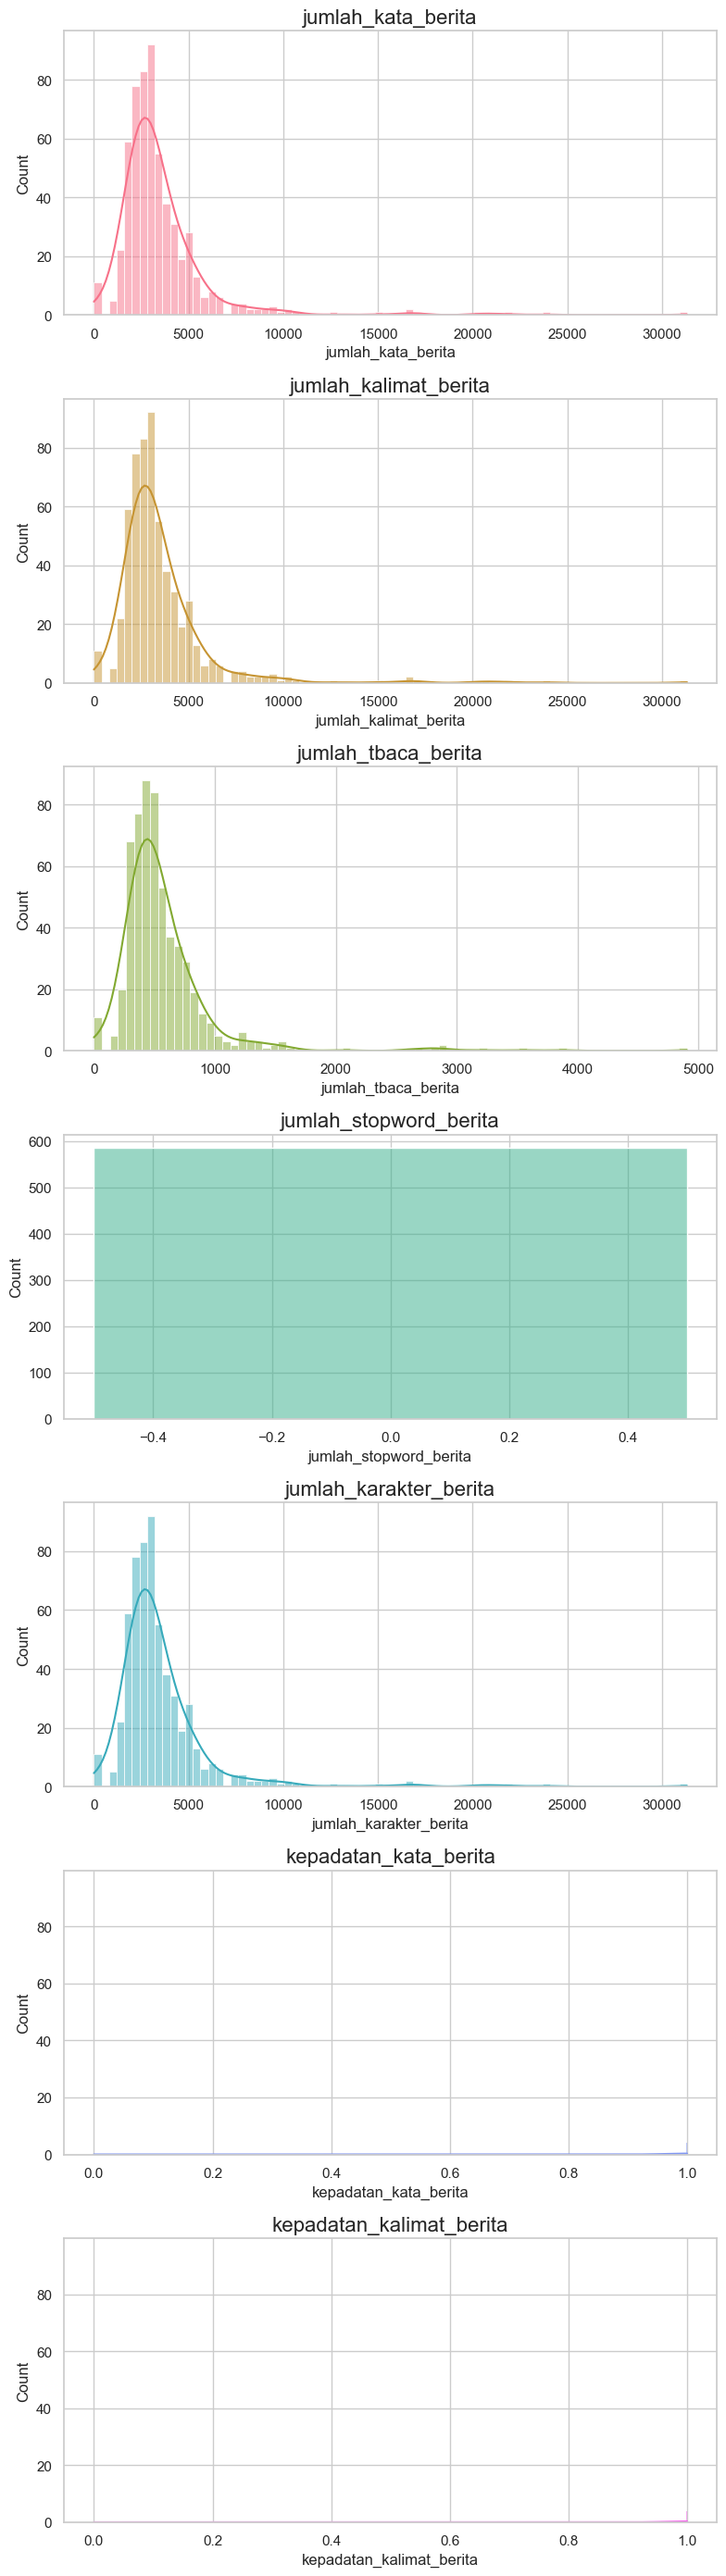

In [14]:
# Detail Berita
plot_vars = np.array([['jumlah_kata_berita', 'jumlah_kalimat_berita', 'jumlah_tbaca_berita',
                       'jumlah_stopword_berita', 'jumlah_karakter_berita', 'kepadatan_kata_berita',
                       'kepadatan_kalimat_berita']])

variables_to_plot = np.ravel(plot_vars)

x_labels = ['jumlah_kata_berita', 'jumlah_kalimat_berita', 'jumlah_tbaca_berita',
            'jumlah_stopword_berita', 'jumlah_karakter_berita', 'kepadatan_kata_berita',
            'kepadatan_kalimat_berita']

sns.set(style="whitegrid")

num_rows = len(variables_to_plot)
num_cols = 1


plt.figure(figsize=(8, 4 * num_rows))


num_colors = len(variables_to_plot)
random_colors = sns.color_palette("husl", n_colors=num_colors)


for i, (variable, color, x_label) in enumerate(zip(variables_to_plot, random_colors, x_labels), start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[variable], kde=True, color=color)
    plt.xlabel(x_label)
    plt.title(f'{variable}', fontsize=16)
    plt.subplots_adjust(hspace=1.0)  # Menambahkan jarak antar plot

plt.tight_layout()
plt.show()

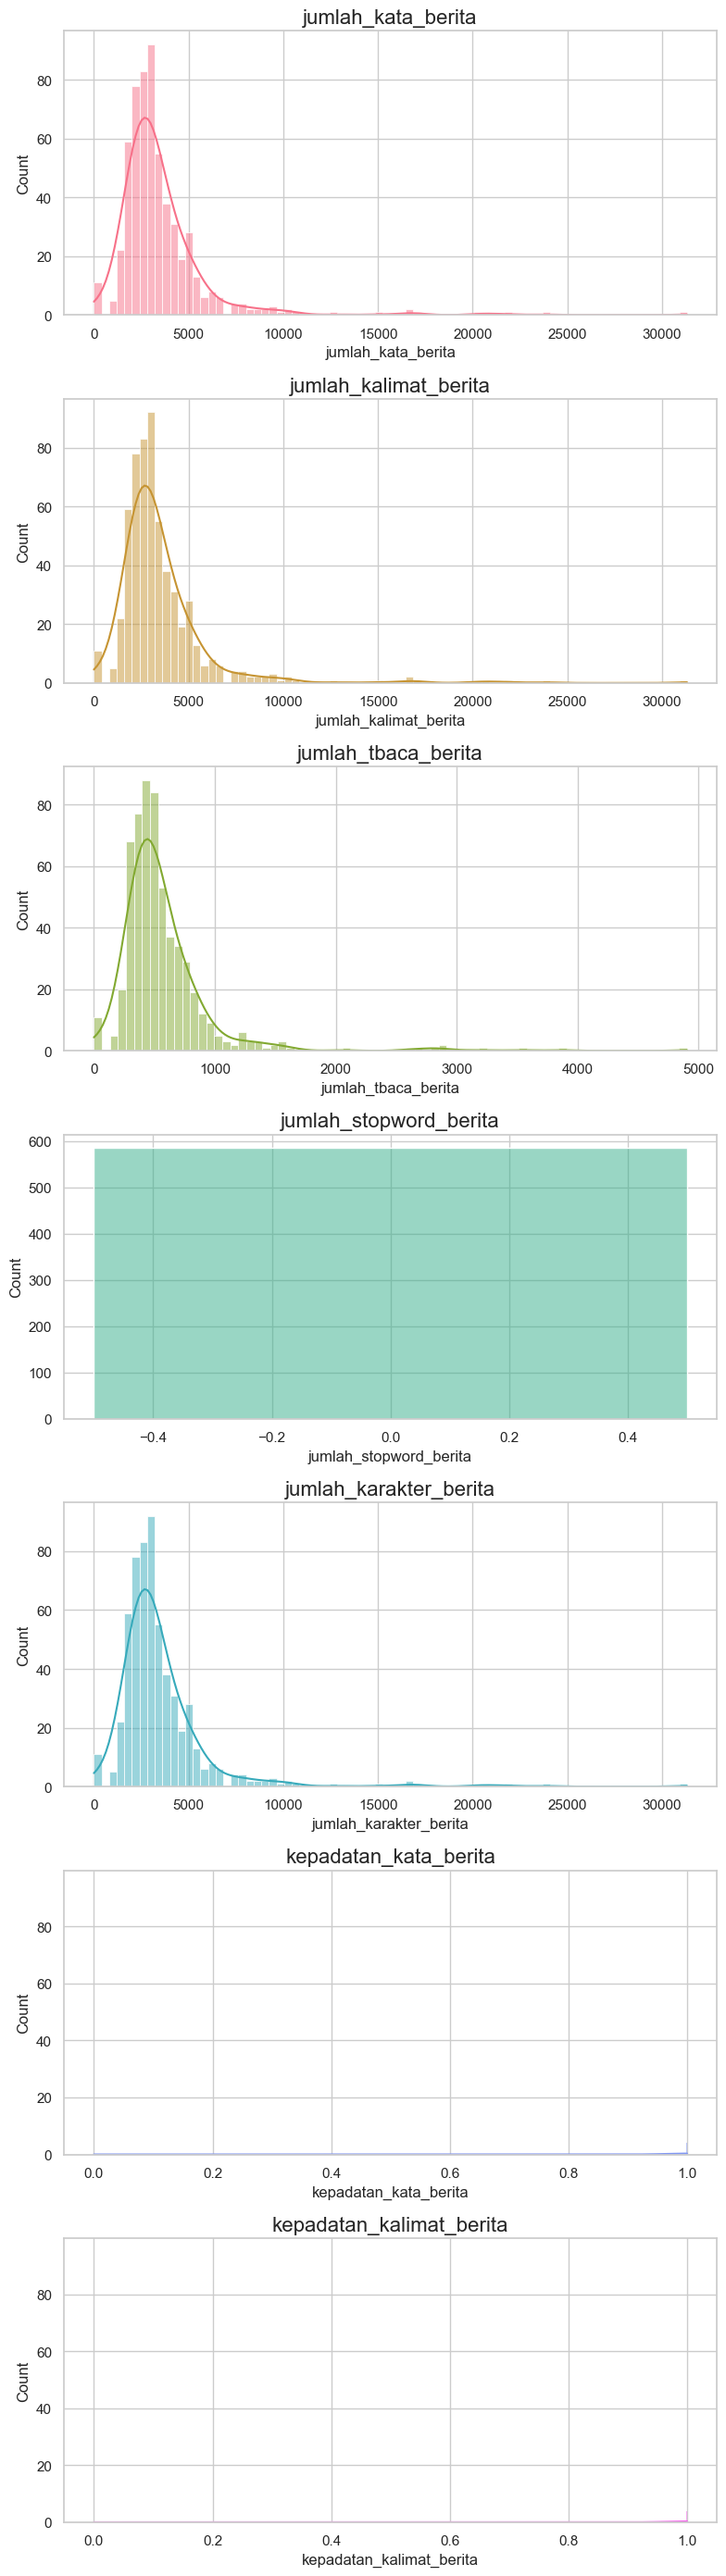

In [15]:
# Ringkasan
plot_vars = np.array([['jumlah_kata_berita', 'jumlah_kalimat_berita', 'jumlah_tbaca_berita',
                       'jumlah_stopword_berita', 'jumlah_karakter_berita', 'kepadatan_kata_berita',
                       'kepadatan_kalimat_berita']])

variables_to_plot = np.ravel(plot_vars)

x_labels = ['jumlah_kata_berita', 'jumlah_kalimat_berita', 'jumlah_tbaca_berita',
            'jumlah_stopword_berita', 'jumlah_karakter_berita', 'kepadatan_kata_berita',
            'kepadatan_kalimat_berita']

sns.set(style="whitegrid")

num_rows = len(variables_to_plot)
num_cols = 1


plt.figure(figsize=(8, 4 * num_rows))


num_colors = len(variables_to_plot)
random_colors = sns.color_palette("husl", n_colors=num_colors)


for i, (variable, color, x_label) in enumerate(zip(variables_to_plot, random_colors, x_labels), start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[variable], kde=True, color=color)
    plt.xlabel(x_label)
    plt.title(f'{variable}', fontsize=16)
    plt.subplots_adjust(hspace=1.0)  # Menambahkan jarak antar plot

plt.tight_layout()
plt.show()

*referensi stopword:*
https://static.hikaruyuuki.com/wp-content/uploads/stopword_list_tala.txt

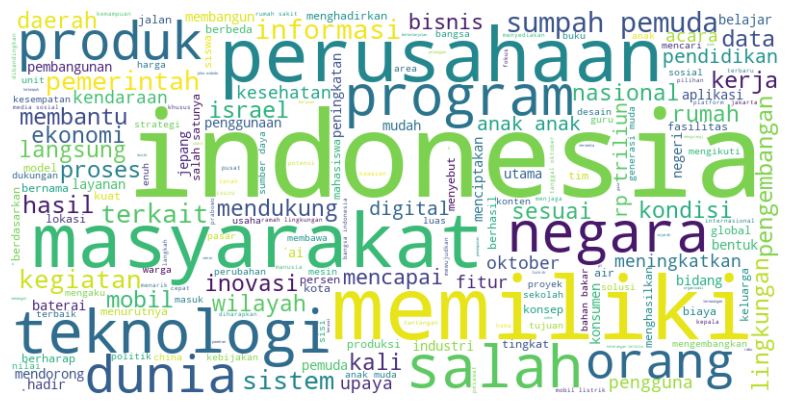

In [16]:
# Wordcloud

data = df['isi_berita']

# Gabungkan semua string dari dataset
joined_text = " ".join(str(word) for word in data)

# Buang tanda baca dan ubah ke lowercase
cleaned_text = "".join(c if c.isalnum() or c.isspace() else " " for c in joined_text)
cleaned_text = cleaned_text.lower()

# Tentukan stopwords dengan standar library Sastrawi
sastrawi_stopword_remover = StopWordRemoverFactory()
sastrawi_stopwords = sastrawi_stopword_remover.get_stop_words()

# Menambahkan stopwords yang menurut kita
personalized_stopwords_file = "stopword_list_tala.txt"
with open(personalized_stopwords_file, "r") as file:
    personalized_stopwords = [line.strip() for line in file]

# Gabungkan stopwords Sastrawi dengan stopwords yang dipersonalisasi
combined_stopwords = set(sastrawi_stopwords).union(personalized_stopwords)

# Hapus stopwords menggunakan daftar stopwords gabungan
cleaned_text_no_stopwords = " ".join(word for word in cleaned_text.split() if word not in combined_stopwords)

# Hapus karakter dan tanda baca non-alfanumerik
cleaned_text_no_special_chars = re.sub(r'[^a-zA-Z\s]', '', cleaned_text_no_stopwords)

# Hapus nilai numerik
cleaned_text_no_numerical = " ".join(word for word in cleaned_text_no_special_chars.split() if not word.isdigit())

# Generate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text_no_numerical)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

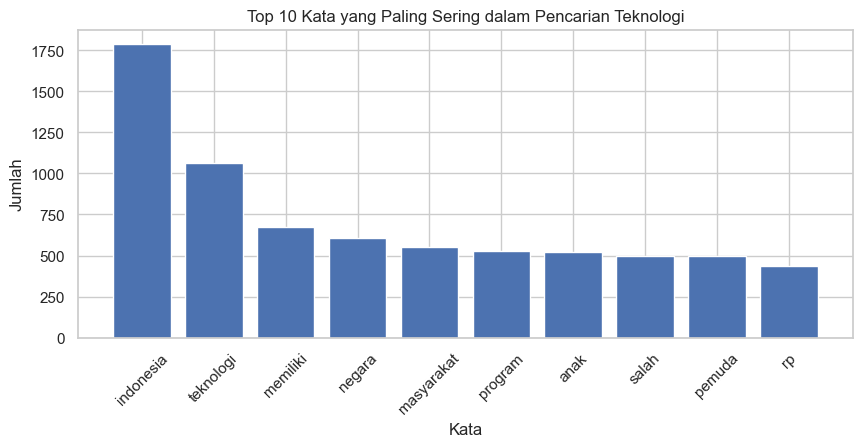

In [17]:
# Tokenize teks tadi untuk mendapatkan kata-kata individual
words = cleaned_text_no_numerical.split()

# Hitung frekuensi setiap kata
word_freq = Counter(words)

# Urutkan kata-kata berdasarkan frekuensinya dalam urutan menurun
sorted_word_freq = word_freq.most_common()

# Pilih 10 kata teratas
top_words = dict(sorted_word_freq[:10])

# Plot
plt.figure(figsize=(10, 4))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Kata')
plt.ylabel('Jumlah')
plt.title('Top 10 Kata yang Paling Sering dalam Pencarian Teknologi')
plt.xticks(rotation=45)
plt.show()

## *Preprocessing*

In [18]:
def generate_summaries(model, tokenizer, article):
    input_ids = tokenizer.encode(article, truncation=True, max_length = 512, return_tensors='pt')
    summary_ids = model.generate(
                input_ids,
                min_length=20,
                max_length=80,
                num_beams=10,
                repetition_penalty=2.5,
                length_penalty=1.0,
                early_stopping=True,
                no_repeat_ngram_size=2,
                use_cache=True,
                do_sample = True,
                temperature = 0.8,
                top_k = 50,
                top_p = 0.95
            )
    summary_text = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary_text

In [19]:
def eval_models(model, tokenizer):
    summaries = []
    for article in tqdm((df["isi_berita"]), total=len(df["isi_berita"])):
        summary_text = generate_summaries(model, tokenizer, article)
        summaries.append(summary_text)

    # calculate ROUGE
    rouge = load_metric("rouge")
    # rouge_metric = evaluate.load("precision")

    rouge_names = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']

    rouge.add_batch(predictions = summaries, references = df["ringkasan"])
    score = rouge.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
    df_eval = pd.DataFrame.from_dict(rouge_dict, orient="index", columns=["score"])

    return df_eval, summaries

## ***Training Model***
Model yang digunakan ialah jenis model pre-trained. Pre-trained model merupakan model atau jaringan yang telah dibuat oleh orang lain dan dilatih pada dataset besar untuk menyelesaikan masalah serupa. Dalam NLP biasa menggunakan transformer. Transformer adalah model rangkaian saraf yang menggunakan perhatian (attention) untuk memodelkan keterkaitan antara urutan token. Perhatian adalah mekanisme yang memungkinkan model untuk memfokuskan pada token tertentu dalam urutan input.

Transformer terdiri dari dua bagian utama: encoder dan decoder. Encoder bertanggung jawab untuk memahami urutan input, sedangkan decoder bertanggung jawab untuk menghasilkan urutan output.

---
*Referensi Model*
1. **BERT2BERT**: https://huggingface.co/cahya/bert2bert-indonesian-summarization
2. **BERT2GPT**: https://huggingface.co/cahya/bert2gpt-indonesian-summarization
3. **T5**: https://huggingface.co/panggi/t5-base-indonesian-summarization-cased atau https://huggingface.co/cahya/t5-base-indonesian-summarization-cased


### ***Metriks ROUGE***
*ROUGE (Recall-Oriented Understudy for Gisting Evaluation) adalah metrik populer yang digunakan untuk mengevaluasi kualitas ringkasan teks. ROUGE mengukur tumpang tindih antara ringkasan yang dihasilkan dan ringkasan referensi dengan membandingkan n-gram (urutan kata yang bersebelahan) antara kedua ringkasan. Metrik ROUGE yang paling umum digunakan adalah ROUGE-1, ROUGE-2, dan ROUGE-L. **ROUGE-1** mengukur **tumpang tindih unigram** (kata tunggal), **ROUGE-2** mengukur **tumpang tindih bigram**(dua kata berturut-turut), dan **ROUGE-L** mengukur **subsequence terpanjang** yang sama antara kedua ringkasan. Skor berkisar dari 0 hingga 1, dengan skor yang lebih tinggi menunjukkan ringkasan yang lebih baik.*

### ***1. BERT2BERT***
*BERT2BERT adalah model rangkaian saraf encoder-decoder yang menggunakan BERT sebagai encoder dan decoder. Model ini dilatih pada corpus ringkasan berita, dan dapat digunakan untuk menghasilkan ringkasan teks yang informatif dan akurat.*

In [ ]:
MODEL_PATH = 'cahya/bert2bert-indonesian-summarization'

tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
tokenizer.bos_token = tokenizer.cls_token
tokenizer.eos_token = tokenizer.sep_token
model = EncoderDecoderModel.from_pretrained(MODEL_PATH).to(device)

df_eval_bert2bert, summaries_bert2bert = eval_models(model=model, tokenizer=tokenizer)
df_eval_bert2bert

100%|██████████| 576/576 [1:38:09<00:00, 10.23s/it]
<ipython-input-27-a35d47384e17>:8: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = load_metric("rouge")


score
rouge1     0.447922
rouge2     0.327674
rougeL     0.416801
rougeLsum  0.417642

### ***2. BERT2GPT***
*BERT2GPT adalah model rangkaian saraf encoder-decoder yang menggunakan BERT sebagai encoder dan GPT-2 sebagai decoder. Model ini juga dilatih pada corpus ringkasan berita, dan dapat digunakan untuk menghasilkan ringkasan teks yang informatif dan akurat. Namun, BERT2GPT lebih unggul dalam menghasilkan ringkasan yang lebih kreatif dan menarik.*

In [ ]:
MODEL_PATH = 'cahya/bert2gpt-indonesian-summarization'

tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
tokenizer.bos_token = tokenizer.cls_token
tokenizer.eos_token = tokenizer.sep_token
model = EncoderDecoderModel.from_pretrained(MODEL_PATH).to(device)

df_eval_bert2gpt, summaries_bert2gpt = eval_models(model = model, tokenizer=tokenizer)
df_eval_bert2gpt

### ***3. T5***
*T5 adalah model pembelajaran transfer (transfer learning) yang dapat digunakan untuk berbagai macam tugas, termasuk summarization. T5 dilatih pada corpus teks dan kode yang sangat besar, dan dapat digunakan untuk menghasilkan ringkasan teks yang informatif dan akurat, bahkan untuk teks yang kompleks dan teknis.*

*Cahya*

In [ ]:
MODEL_PATH = 'cahya/t5-base-indonesian-summarization-cased'

tokenizer = T5Tokenizer.from_pretrained(MODEL_PATH)
model = T5ForConditionalGeneration.from_pretrained(MODEL_PATH)

df_eval_t5_cahya, summaries_t5_cahya = eval_models(model = model, tokenizer=tokenizer)
df_eval_t5_cahya

*Panggi*

In [ ]:
MODEL_PATH = 'panggi/t5-base-indonesian-summarization-cased'

tokenizer = T5Tokenizer.from_pretrained(MODEL_PATH)
model = T5ForConditionalGeneration.from_pretrained(MODEL_PATH)

df_eval_t5_panggi, summaries_t5_panggi = eval_models(model = model, tokenizer=tokenizer)
df_eval_t5_panggi

# ***Compare***

In [ ]:
pd.set_option('display.max_colwidth', None)

df_compare_res = pd.DataFrame({
    "ORIGINAL TEXT": df["isi_berita"],
    "REFERENCE": df["ringkasan"],
    "BERT2BERT": summaries_bert2bert,
    "BERT2GPT": summaries_bert2gpt,
    "T5 CAHYA": summaries_t5_cahya,
    "T5 PANGGI": summaries_t5_panggi
})

df_compare_res.head(3)

In [ ]:
df_compare_res.to_csv('berita_detikcom_hasil_train_ds', index=False)